In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

Будем учиться классифицировать жанры музыки, полузуюсь не аудио дорожками, а уже осмысленными признаками (правда, не все из них имеют понятные названия). Сами данные можно найти [здесь](https://www.kaggle.com/purumalgi/music-genre-classification). Будем использовать файл `train.csv`. Нашей задачей будет предсказание переменной `Class` (жанр песни) при помощи деревьев решений. Можно попробовать также другие методы классификации, которые мы прошли, и сравнить результаты. При обучении всех моделей не забывайте про разделение на тренировку и тест (или кросс валидацию [ссылка](https://www.youtube.com/watch?v=fSytzGwwBVw)).

### Задание 1. EDA (10 баллов)

Как обычно, начнем с того, что посмотрим на наши данные: типы переменных, пропущенные значения, баланс классов и все такое. Ваш ход:

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


,count,mean,std,min,25%,50%,75%,max,missing_values,dtype
Popularity,17568.00,44.51,17.43,1.00,33.00,44.00,56.00,100.00,428,float64
danceability,17996.00,0.54,0.17,0.06,0.43,0.55,0.66,0.99,0,float64
energy,17996.00,0.66,0.24,0.00,0.51,0.70,0.86,1.00,0,float64
key,15982.00,5.95,3.20,1.00,3.00,6.00,9.00,11.00,2014,float64
loudness,17996.00,-7.91,4.05,-39.95,-9.54,-7.02,-5.19,1.35,0,float64
mode,17996.00,0.64,0.48,0.00,0.00,1.00,1.00,1.00,0,int64
speechiness,17996.00,0.08,0.08,0.02,0.03,0.05,0.08,0.95,0,float64
acousticness,17996.00,0.25,0.31,0.00,0.00,0.08,0.43,1.00,0,float64
instrumentalness,13619.00,0.18,0.30,0.00,0.00,0.00,0.20,1.00,4377,float64
liveness,17996.00,0.20,0.16,0.01,0.10,0.13,0.26,1.00,0,float64


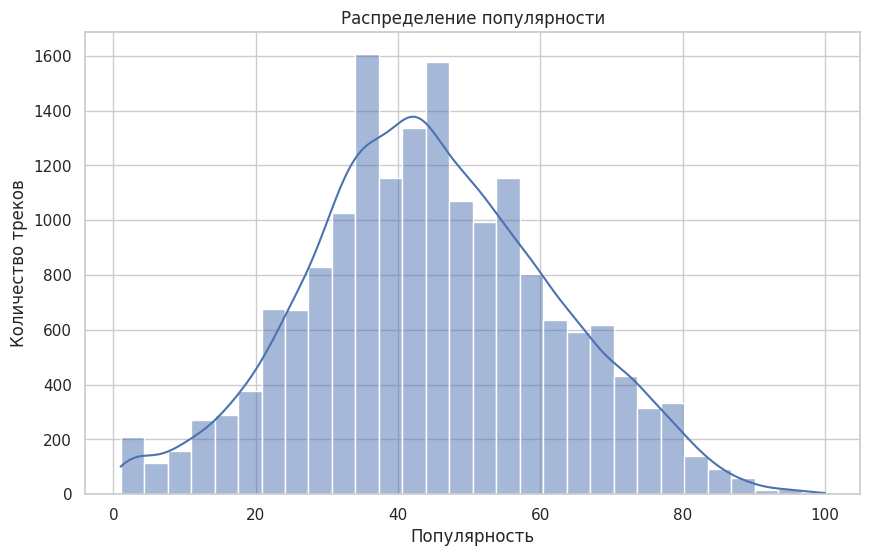

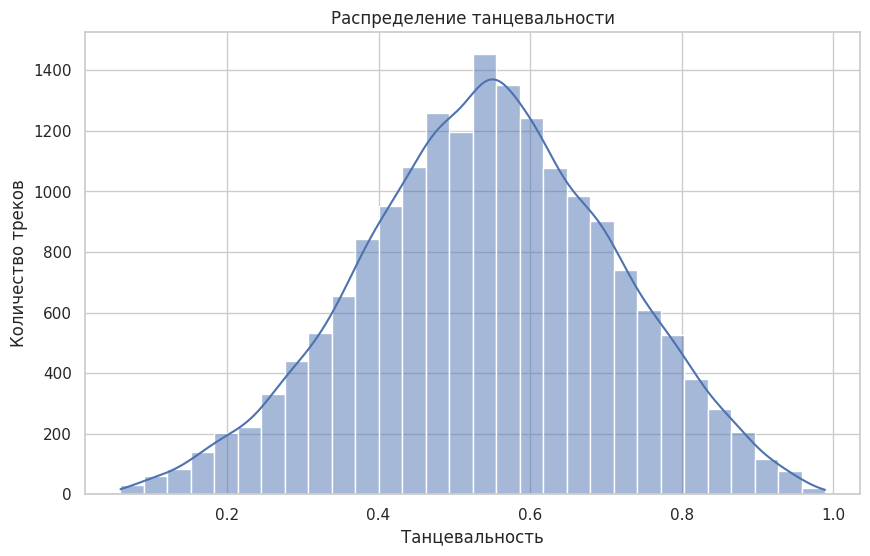

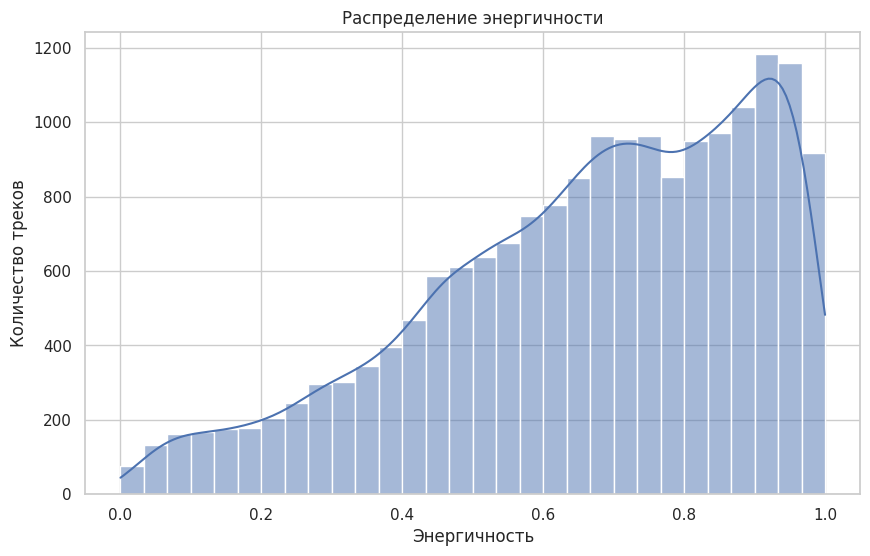

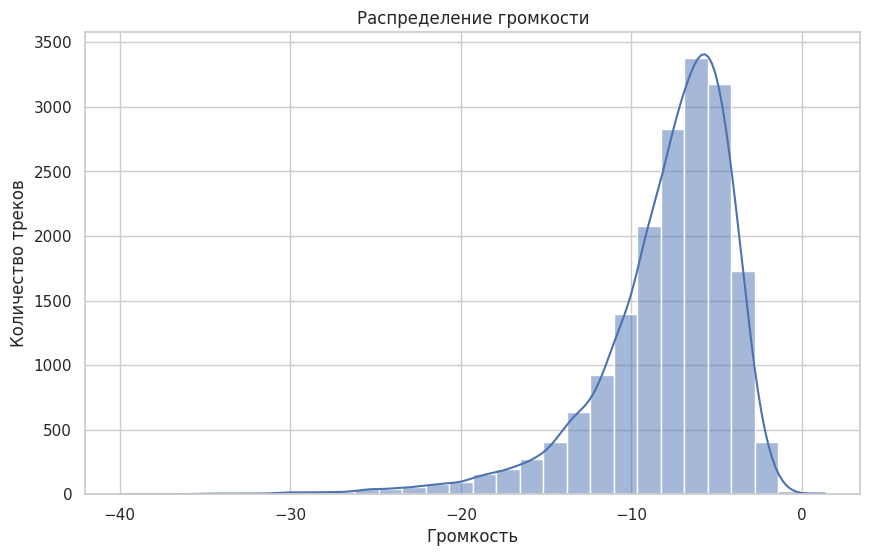

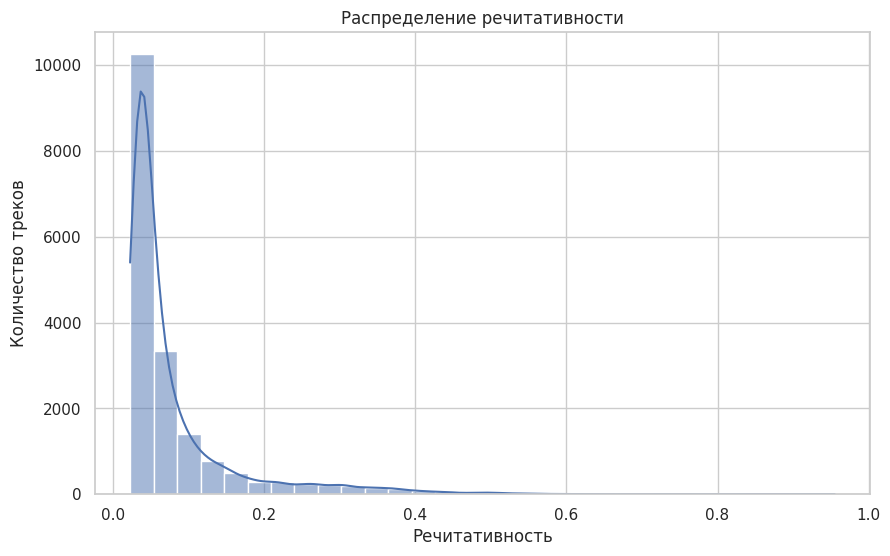

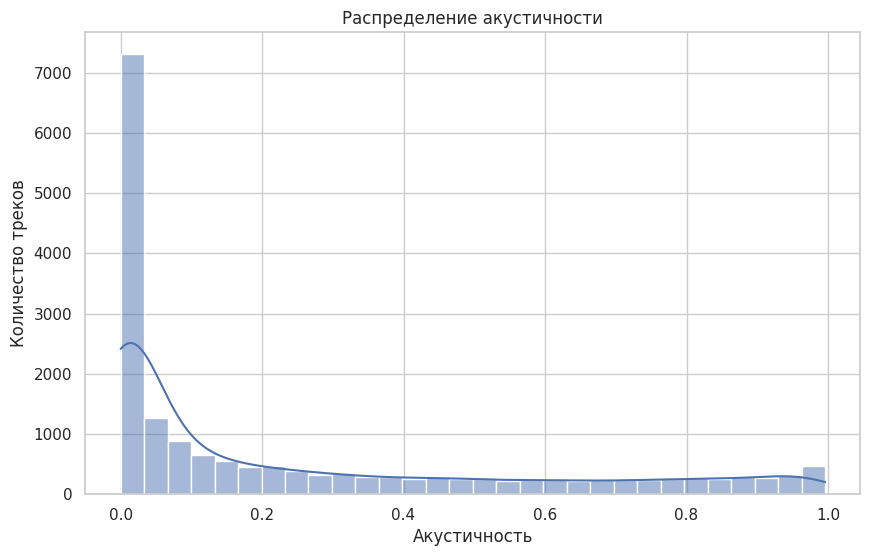

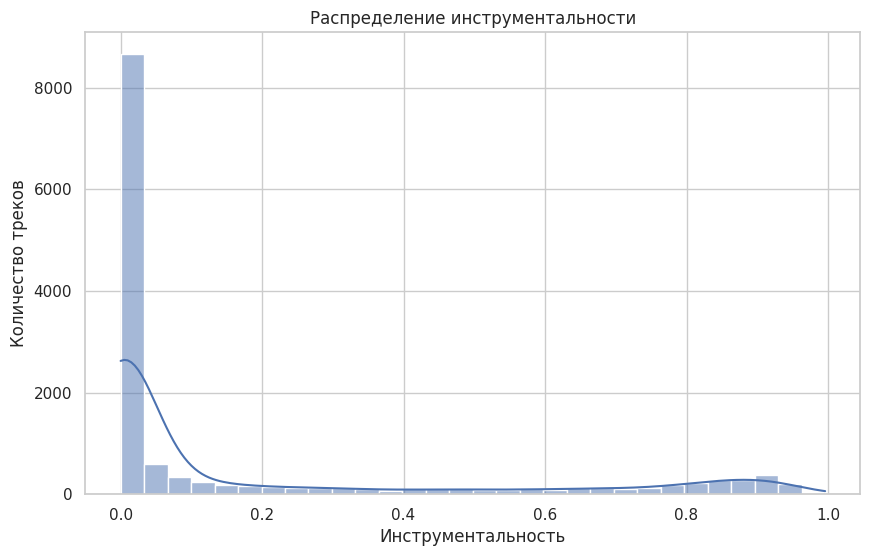

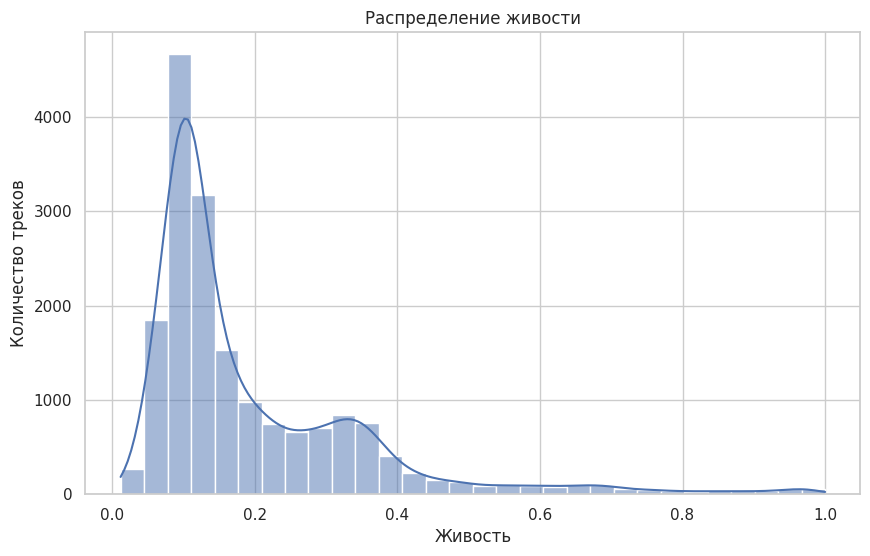

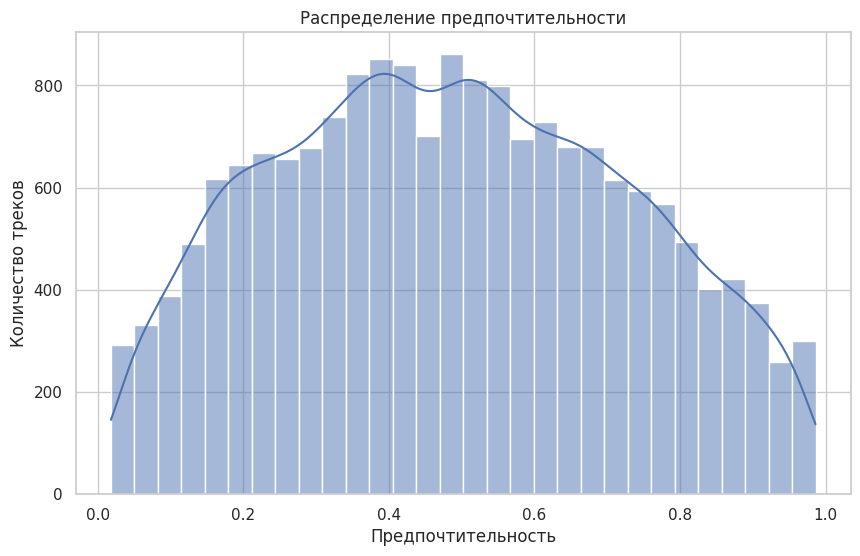

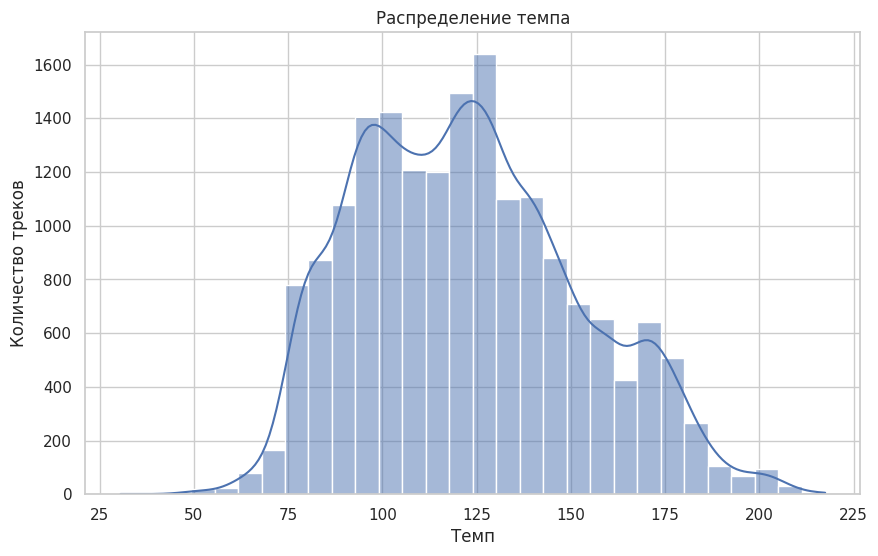

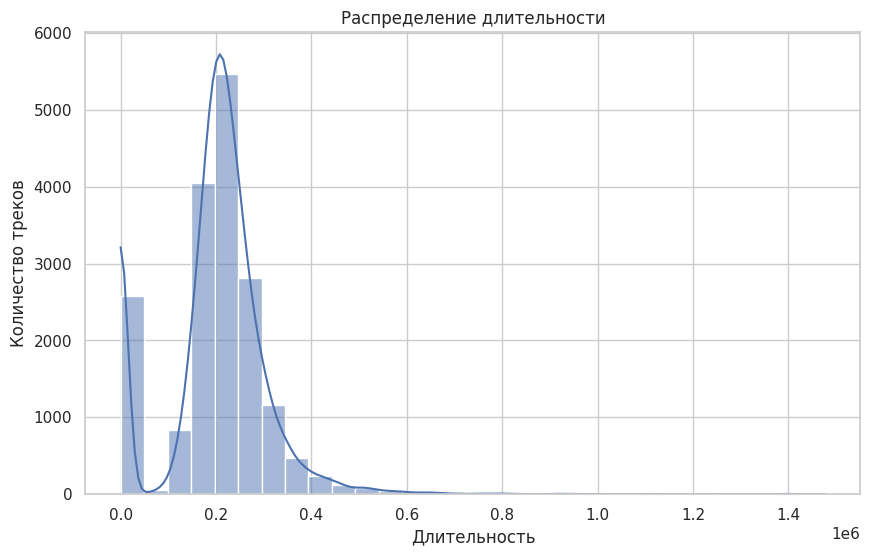

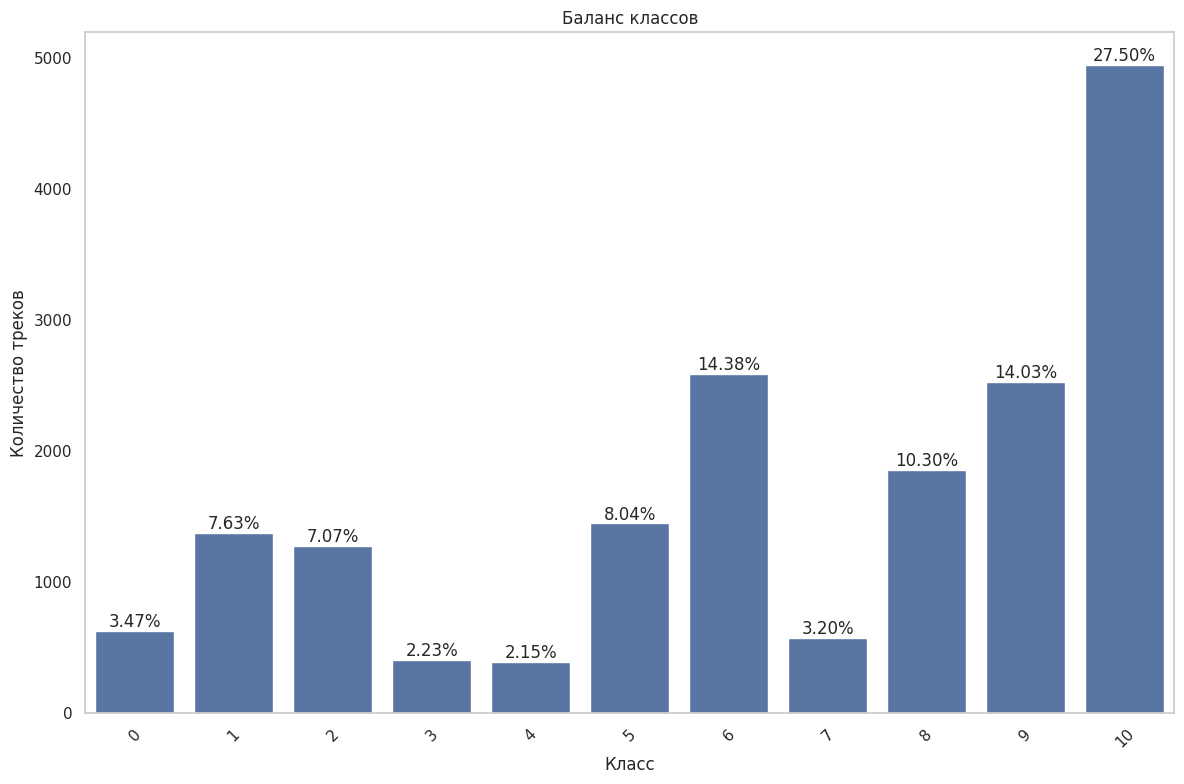

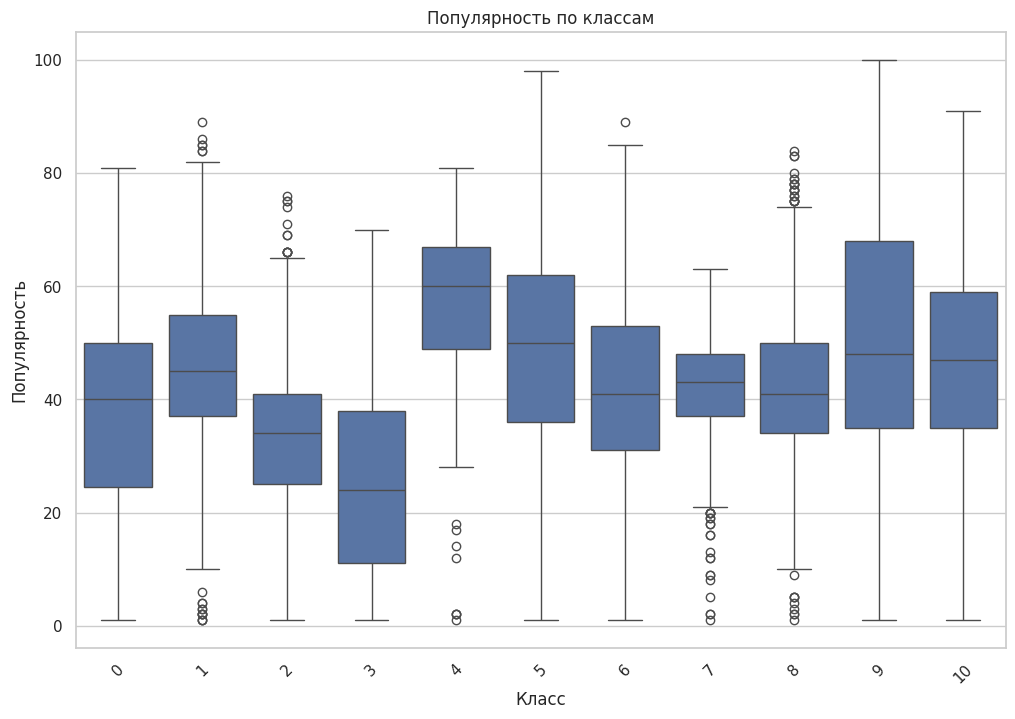

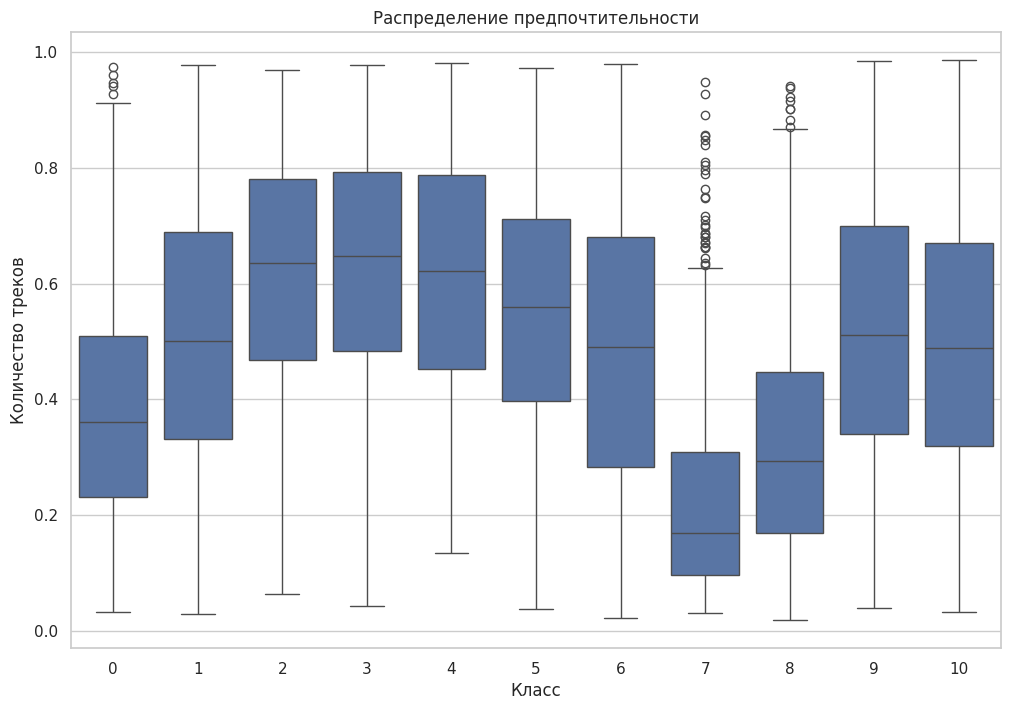

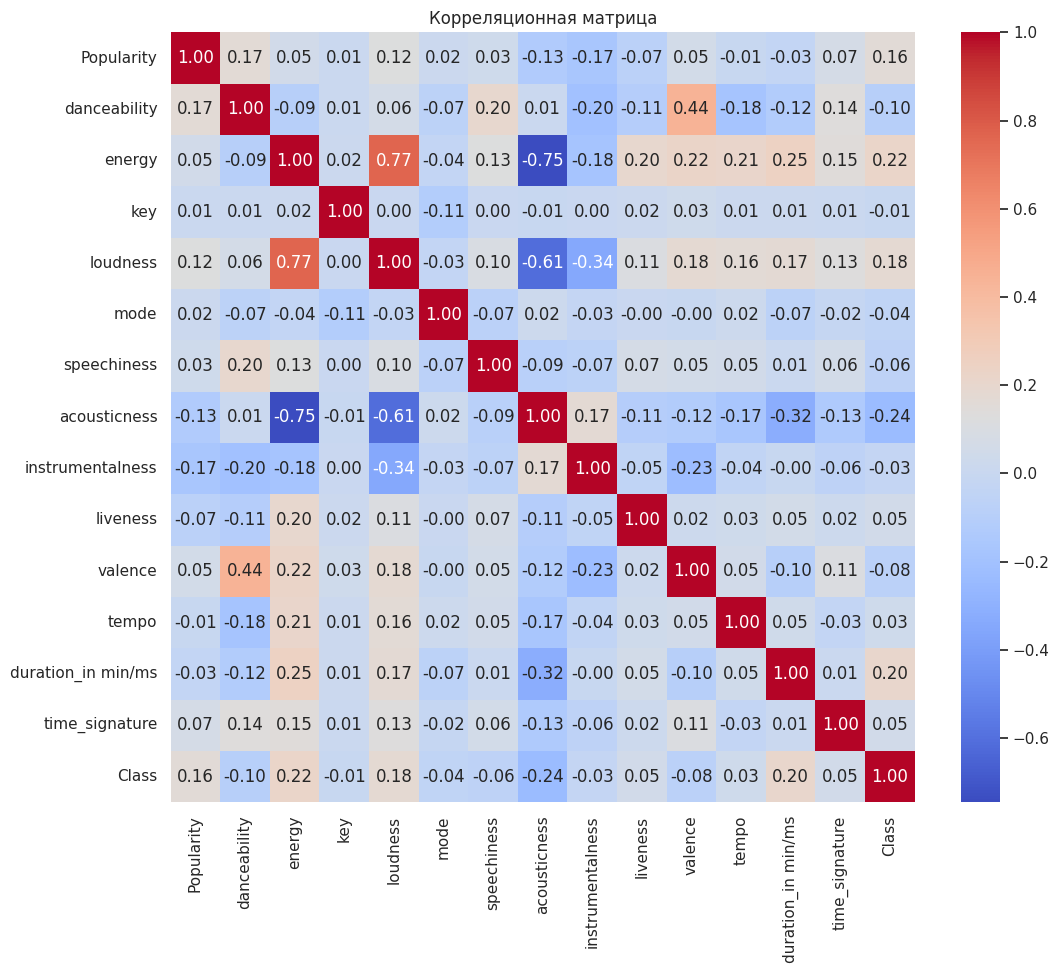

In [23]:
# Основные статистические показатели
##count: Количество непропущенных значений в каждом столбце
##mean: Среднее значение
##std: Стандартное отклонение
##min: Минимальное значение
##25%: 25-й перцентиль (нижний квартиль)
##50% (median): 50-й перцентиль (медиана)
##75%: 75-й перцентиль (верхний квартиль)
##max: Максимальное значение
##missing_values: Количество пропущенных значений
statistical_summary = data.describe().transpose()
statistical_summary['missing_values'] = data.isnull().sum()
statistical_summary['dtype'] = data.dtypes
display(statistical_summary.style.background_gradient(cmap='coolwarm', axis=0).format(precision=2))
#Стиль графиков
sns.set(style="whitegrid")
# Распределение популярности
plt.figure(figsize=(10, 6))
sns.histplot(data['Popularity'].dropna(), bins=30, kde=True)
plt.title('Распределение популярности')
plt.xlabel('Популярность')
plt.ylabel('Количество треков')
plt.show()
# Распределение танцевальности
plt.figure(figsize=(10, 6))
sns.histplot(data['danceability'], bins=30, kde=True)
plt.title('Распределение танцевальности')
plt.xlabel('Танцевальность')
plt.ylabel('Количество треков')
plt.show()
# Распределение энергичности
plt.figure(figsize=(10, 6))
sns.histplot(data['energy'], bins=30, kde=True)
plt.title('Распределение энергичности')
plt.xlabel('Энергичность')
plt.ylabel('Количество треков')
plt.show()
# Распределение громкости
plt.figure(figsize=(10, 6))
sns.histplot(data['loudness'], bins=30, kde=True)
plt.title('Распределение громкости')
plt.xlabel('Громкость')
plt.ylabel('Количество треков')
plt.show()
# Распределение речитативности
plt.figure(figsize=(10, 6))
sns.histplot(data['speechiness'], bins=30, kde=True)
plt.title('Распределение речитативности')
plt.xlabel('Речитативность')
plt.ylabel('Количество треков')
plt.show()
# Распределение акустичности
plt.figure(figsize=(10, 6))
sns.histplot(data['acousticness'], bins=30, kde=True)
plt.title('Распределение акустичности')
plt.xlabel('Акустичность')
plt.ylabel('Количество треков')
plt.show()
# Распределение инструментальности
plt.figure(figsize=(10, 6))
sns.histplot(data['instrumentalness'], bins=30, kde=True)
plt.title('Распределение инструментальности')
plt.xlabel('Инструментальность')
plt.ylabel('Количество треков')
plt.show()
# Распределение живости
plt.figure(figsize=(10, 6))
sns.histplot(data['liveness'], bins=30, kde=True)
plt.title('Распределение живости')
plt.xlabel('Живость')
plt.ylabel('Количество треков')
plt.show()
# Распределение предпочтительности
plt.figure(figsize=(10, 6))
sns.histplot(data['valence'], bins=30, kde=True)
plt.title('Распределение предпочтительности')
plt.xlabel('Предпочтительность')
plt.ylabel('Количество треков')
plt.show()
# Распределение темпа
plt.figure(figsize=(10, 6))
sns.histplot(data['tempo'], bins=30, kde=True)
plt.title('Распределение темпа')
plt.xlabel('Темп')
plt.ylabel('Количество треков')
plt.show()
# Распределение длительности
plt.figure(figsize=(10, 6))
sns.histplot(data['duration_in min/ms'], bins=30, kde=True)
plt.title('Распределение длительности')
plt.xlabel('Длительность')
plt.ylabel('Количество треков')
plt.show()
# Баланс классов визуализация
plt.figure(figsize=(12, 8))
class_counts = data['Class'].value_counts().sort_index()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Баланс классов')
plt.xlabel('Класс')
plt.ylabel('Количество треков')
plt.xticks(rotation=45)
plt.grid(axis='y')
total = len(data['Class'])
for index, value in enumerate(class_counts):
    percentage = (value / total) * 100
    plt.text(index, value + 30, f'{percentage:.2f}%', ha='center')
plt.tight_layout()
plt.show()
# Дополнительная визуализация: Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Class', y='Popularity', data=data)
plt.title('Популярность по классам')
plt.xlabel('Класс')
plt.ylabel('Популярность')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(12, 8))
sns.boxplot(x='Class', y='valence', data=data)
plt.title('Распределение предпочтительности')
plt.xlabel('Класс')
plt.ylabel('Количество треков')
plt.show()
# Корреляционная матрица
plt.figure(figsize=(12, 10))
sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

### Задание 2. Обучение дерева решений (10 баллов)

Предобработайте признаки так, чтобы их можно было подать в модель дерева решений и обучите ее, постарайтесь подобрать оптимальные гиперпараметры, которые вам известны. Постарайтесь также обосновать выбор метрики в данном случае. При подборе гиперпараметров может помочь `GridSearchCV` [ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

**Предварительная обработка данных**

In [35]:
# Заполнение пропущенных значений
imputer_median = SimpleImputer(strategy='median') # Для числовых переменных
imputer_mode = SimpleImputer(strategy='most_frequent') # Для категориальной переменной
data['Popularity'] = imputer_median.fit_transform(data[['Popularity']])
data['key'] = imputer_mode.fit_transform(data[['key']])
data['instrumentalness'] = imputer_median.fit_transform(data[['instrumentalness']])
##Popularity: Можно заполнить медианным значением, так как популярность может сильно варьироваться и медиана будет менее чувствительна к выбросам, чем среднее.
##key: Это категориальная переменная (представляет музыкальный тон), поэтому можно заполнить наиболее часто встречающимся значением (модой).
##instrumentalness: Для этого параметра также может подойти заполнение медианным значением, учитывая, что он представляет собой долю треков без вокала и может сильно варьироваться в зависимости от жанра.
# Проверка на наличие пропущенных значений после заполнения
data.isnull().sum().max()

0

In [36]:
# Подготовка признаков и целевой переменной
X = data.drop(['Artist Name', 'Track Name', 'Class'], axis=1)
y = data['Class']
# Масштабирование признаков
scaler = StandardScaler()

**Выбор модели и кросс-валидация**

In [40]:
# Подготовка признаков и целевой переменной
X = data.drop(['Artist Name', 'Track Name', 'Class'], axis=1)
y = data['Class']
# Масштабирование признаков
scaler = StandardScaler()
# Создание моделей для сравнения
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": make_pipeline(scaler, LogisticRegression(max_iter=1000, random_state=42))
}
# Словарь для хранения результатов кросс-валидации (т е у нас 10 фолдов)
cv_scores = {}
# Применение 10-кратной кросс-валидации для каждой модели
for name, model in models.items():
    score = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    cv_scores[name] = score
cv_scores

{'Decision Tree': 0.3633587795688963,
 'Random Forest': 0.5026654931752208,
 'Logistic Regression': 0.4978873448211969}

Дальше будем использовать RandomForestClassifier, у него результаты лучше

**Подбор гиперпараметров для RandomForestClassifier**

In [42]:
# Упрощенное определение параметров для поиска (ноутбук не осилил GridSearchCV, так что будет RandomizedSearchCV)
param_dist = {
    'n_estimators': randint(10, 200),  # Случайное число деревьев в диапазоне от 10 до 200
    'max_depth': [None, 10, 20, 30],  # Максимальная глубина деревьев
    'min_samples_split': randint(2, 11),  # Минимальное количество объектов для разделения узла
    'min_samples_leaf': randint(1, 11),  # Минимальное количество объектов в листе
    'max_features': ['sqrt', 'log2']  # Количество признаков для поиска лучшего разделения
}
# Инициализация модели случайного леса
rf = RandomForestClassifier(random_state=42)
# Настройка случайного поиска с кросс-валидацией
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)
# Поиск наилучших гиперпараметров
random_search.fit(X, y)
# Лучшие параметры и лучшая оценка
best_params = random_search.best_params_
best_score = random_search.best_score_
best_params, best_score

Fitting 5 folds for each of 10 candidates, totalling 50 fits


({'max_depth': 30,
  'max_features': 'log2',
  'min_samples_leaf': 8,
  'min_samples_split': 4,
  'n_estimators': 159},
 0.5362296008150412)

Вторая попытка, где параметров больше, ее и взяла за основу дальше

In [50]:
# Определение параметров для поиска
param_dist = {
    'n_estimators': randint(50, 300),  # Увеличенный диапазон для количества деревьев
    'max_depth': [None, 10, 20, 30, 40, 50],  # Расширенный диапазон глубины
    'min_samples_split': randint(2, 20),  # Расширенный диапазон для мин. кол-ва объектов для разделения
    'min_samples_leaf': randint(1, 20),  # Расширенный диапазон для мин. кол-ва объектов в листе
    'max_features': ['sqrt', 'log2', None],  # Добавлен вариант без ограничения кол-ва признаков
    'bootstrap': [True, False],  # Добавлен параметр использования бутстрап-выборки
    'class_weight': [None, 'balanced']  # Добавлен параметр для веса классов
}
# Инициализация модели случайного леса
rf = RandomForestClassifier(random_state=42)
# Настройка случайного поиска с кросс-валидацией
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, verbose=5, random_state=42)
# Поиск наилучших гиперпараметров
random_search.fit(X, y)
# Лучшие параметры и лучшая оценка
best_params = random_search.best_params_
best_score = random_search.best_score_
print(best_params, best_score)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'bootstrap': False, 'class_weight': None, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 17, 'min_samples_split': 11, 'n_estimators': 269} 0.5386748016424315


**Оценка финальной модели**

In [56]:
# Разделение исходного датасета на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Создание и обучение модели с лучшими гиперпараметрами
rf_best = RandomForestClassifier(bootstrap = False, class_weight = None, max_depth = 30, max_features = 'sqrt', min_samples_leaf = 17, min_samples_split = 11, n_estimators = 269, random_state=42)
rf_best.fit(X_train, y_train)
# Оценка производительности модели на тестовой выборке
accuracy_test = rf_best.score(X_test, y_test)
accuracy_test

0.5355555555555556

### Задание 3. Другие модели (без баллов, просто если есть желание)

Проделайте операции из **Задания 2** с другими известными вам классификаторами. Стало ли лучше?

### Задание 4. (0.5 доп. балла)

Расскажите про свои любимые фильмы, мультики и тд.

1. Фильм - Неуместный человек

2. Мультсериал - Конь Боджек

Люблю психологические триллеры и атмосферные фильмы, фестивальные фильмы